# Appendix C Data 


## C.3 Pipe operator `%>%`


Under the hood, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)` and so on. Functions in `tidyverse` are almost always easy to write and read using `%>%`. But we can use `%>%` on any function, not just those defined in `tidyverse`. Here is an example on printing "hello world" using pipe. 

In [4]:
library(tidyverse)
print("hello world")
"hello world" %>% print()
"hello world" %>% print

[1] "hello world"
[1] "hello world"
[1] "hello world"


We will now manipulate the `tibble` object with the pipe operator `%>%`. The `dplyr`/`tidyverse` package offers the `mutate()` and `transmute()` commands to add new variables to data tibbles. The syntax is:
```{r}
<tibble> %>% mutate(<new variable> = <formula for new variable>,  <other new variable> = <other formula>)
```
This returns a copy of `<tibble>` with the new variables added on. `transmute()` does the same thing as `mutate()` but only keeps the new variables.

Let us zoom in on a few variables of interest.

In [6]:
library(nycflights13)
sub_flights <- select(flights, year:day, dep_time, arr_time, origin, dest)
head(sub_flights)

year,month,day,dep_time,arr_time,origin,dest
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
2013,1,1,517,830,EWR,IAH
2013,1,1,533,850,LGA,IAH
2013,1,1,542,923,JFK,MIA
2013,1,1,544,1004,JFK,BQN
2013,1,1,554,812,LGA,ATL
2013,1,1,554,740,EWR,ORD


Use `%>%` to create the table above. 

In [7]:
flights %>% select(year:day,dep_time, arr_time, origin, dest) %>% head()

year,month,day,dep_time,arr_time,origin,dest
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
2013,1,1,517,830,EWR,IAH
2013,1,1,533,850,LGA,IAH
2013,1,1,542,923,JFK,MIA
2013,1,1,544,1004,JFK,BQN
2013,1,1,554,812,LGA,ATL
2013,1,1,554,740,EWR,ORD


Additional variable can be added using the `mutate()` function. We already have an `air_time` variable. Let us compute the total time for the flight by subtracting the time of departure `dep_time` from time of arrival `arr_time`.

In [9]:
sub_flights %>% mutate(total_time = arr_time - dep_time) %>% head()

year,month,day,dep_time,arr_time,origin,dest,total_time
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
2013,1,1,517,830,EWR,IAH,313
2013,1,1,533,850,LGA,IAH,317
2013,1,1,542,923,JFK,MIA,381
2013,1,1,544,1004,JFK,BQN,460
2013,1,1,554,812,LGA,ATL,258
2013,1,1,554,740,EWR,ORD,186


Another way to do the same thing is by using `%>%` twice.

In [10]:
flights %>% select(year:day,dep_time, arr_time, origin, dest) %>% mutate(total_time = arr_time - dep_time) %>% head()

year,month,day,dep_time,arr_time,origin,dest,total_time
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>
2013,1,1,517,830,EWR,IAH,313
2013,1,1,533,850,LGA,IAH,317
2013,1,1,542,923,JFK,MIA,381
2013,1,1,544,1004,JFK,BQN,460
2013,1,1,554,812,LGA,ATL,258
2013,1,1,554,740,EWR,ORD,186


We notice something odd though. When we subtract 5h 17m from 8h 30m we should get 3h 13m, i.e. 193 minutes. But instead we get 313 minutes below.

The issue is that `dep_time` and `arr_time` are in the hour-minute notation, so you cannot add and subtract them like regular numbers. We should first convert these times into the number of minutes elapsed since midnight.

We want add to new variables `new_dep` and `new_arr` but we need to write a function first that can do the conversion. The function is given below; we'll learn how it works later in the semester. For now just think of it as a black box that converts times from one format to another.

In [15]:
hourmin2min<-function(hourmin){
    min <- hourmin %% 100; 
    hour <- (hourmin - min) %/% 100;
    return(hour*60+min)
}

Let us test the function on 530. That's 5h 30min, i.e., 330 minutes since midnight.

In [17]:
hourmin2min(530)
5*60+30

[1] 330

[1] 330

The `hourmin2min` function is _vectorized_: given a vector, it outputs a vector.

In [18]:
hourmin2min(c(530,817))

[1] 330 497

Let us now create two new variables obtained from `arr_time` and `dep_time` by converting them into minutes since midnight. In the same command, we can also create a new `total_time` column containing their difference.

In [21]:
sub_flights <- sub_flights %>% mutate( new_dep = hourmin2min(dep_time), new_arr = hourmin2min(arr_time) )
head(sub_flights)

year,month,day,dep_time,arr_time,origin,dest,new_arr,new_dep
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
2013,1,1,517,830,EWR,IAH,510,317
2013,1,1,533,850,LGA,IAH,530,333
2013,1,1,542,923,JFK,MIA,563,342
2013,1,1,544,1004,JFK,BQN,604,344
2013,1,1,554,812,LGA,ATL,492,354
2013,1,1,554,740,EWR,ORD,460,354


Now we can subtract the departure time `new_dep` from the arrival time `new_arr` to get a new variable `total_time`.

In [22]:
sub_flights %>% mutate(total_time = new_arr-new_dep) %>% head()

year,month,day,dep_time,arr_time,origin,dest,new_arr,new_dep,total_time
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013,1,1,517,830,EWR,IAH,510,317,193
2013,1,1,533,850,LGA,IAH,530,333,197
2013,1,1,542,923,JFK,MIA,563,342,221
2013,1,1,544,1004,JFK,BQN,604,344,260
2013,1,1,554,812,LGA,ATL,492,354,138
2013,1,1,554,740,EWR,ORD,460,354,106


Let us try to do the same thing using pipe just using one line of code.  In this code, we are only interested in the following variables -- `dep_time`, `arr_time`, `new_dep`, `new_arr`, and `total_time`.  

In [23]:
flights %>% select(year:day,dep_time, arr_time, origin, dest) %>%
    mutate(new_dep=hourmin2min(dep_time), new_arr=hourmin2min(arr_time)) %>%
    mutate(total_time = new_arr - new_dep) %>% head()

year,month,day,dep_time,arr_time,origin,dest,new_dep,new_arr,total_time
<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2013,1,1,517,830,EWR,IAH,317,510,193
2013,1,1,533,850,LGA,IAH,333,530,197
2013,1,1,542,923,JFK,MIA,342,563,221
2013,1,1,544,1004,JFK,BQN,344,604,260
2013,1,1,554,812,LGA,ATL,354,492,138
2013,1,1,554,740,EWR,ORD,354,460,106


We can even plot the data by adding a `ggplot` command at the end after manipulating your data.

Let's try to create a table for each month with the mean delay time.  Then plot a barchart for each month.  

`summarise()` ungrouping output (override with `.groups` argument)



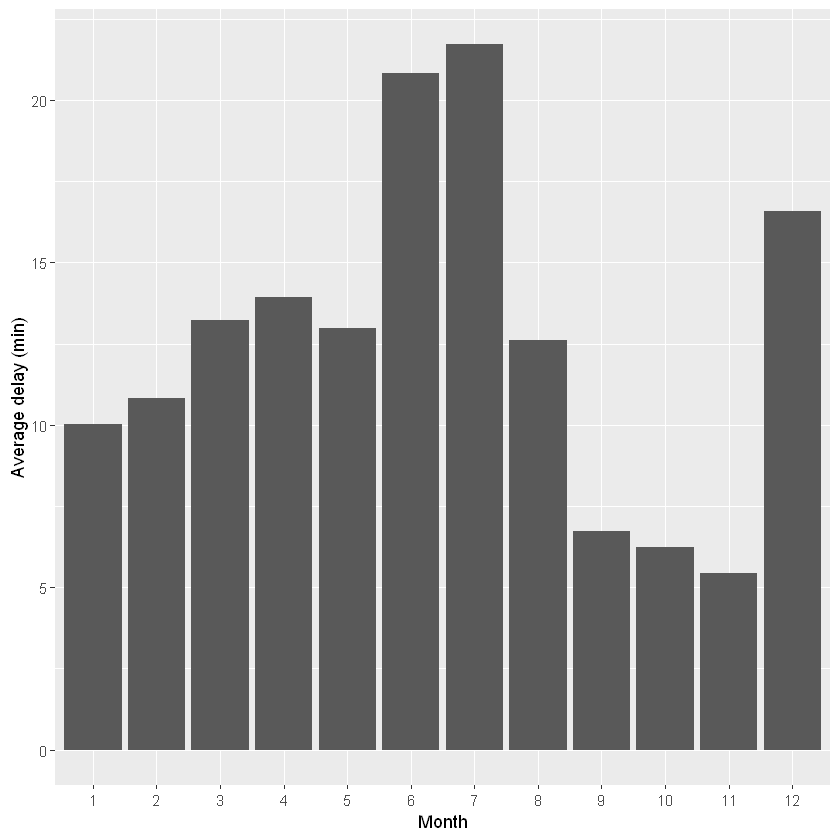

In [26]:
flights %>% group_by(month) %>% 
    summarize(delay=mean(dep_delay,na.rm=TRUE)) %>%
    ggplot() + 
        geom_bar(mapping= aes(x=factor(month),y=delay),stat="identity")+
        labs(x="Month", y="Average delay (min)")